In [2]:
import findspark
findspark.init()

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName("Lodon Crime dataset samples")\
                    .getOrCreate()

In [5]:
data = spark.read\
            .format("csv")\
            .option("header", "true")\
            .load("datasets/london_crime_by_lsoa-100k.csv")

In [6]:
data.printSchema()

root
 |-- lsoa_code: string (nullable = true)
 |-- borough: string (nullable = true)
 |-- major_category: string (nullable = true)
 |-- minor_category: string (nullable = true)
 |-- value: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)



In [51]:
# Clean the data frame to improve performance later
data = data.dropna()
data = data.drop("lsoa_code")

In [52]:
data.count()

99999

In [8]:
data.limit(5).show()

+---------+----------+--------------------+--------------------+-----+----+-----+
|lsoa_code|   borough|      major_category|      minor_category|value|year|month|
+---------+----------+--------------------+--------------------+-----+----+-----+
|E01001116|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+---------+----------+--------------------+--------------------+-----+----+-----+



In [9]:
data.select("borough").distinct().count()

33

In [10]:
data.filter(data["borough"] == "Hackney").show()

+---------+-------+--------------------+--------------------+-----+----+-----+
|lsoa_code|borough|      major_category|      minor_category|value|year|month|
+---------+-------+--------------------+--------------------+-----+----+-----+
|E01001786|Hackney|     Criminal Damage|Criminal Damage T...|    0|2011|    6|
|E01001794|Hackney|Violence Against ...|          Harassment|    1|2013|    2|
|E01001787|Hackney|     Criminal Damage|Other Criminal Da...|    0|2011|    7|
|E01001738|Hackney|Violence Against ...|        Wounding/GBH|    0|2013|   12|
|E01001807|Hackney|  Theft and Handling|  Other Theft Person|    0|2016|    8|
|E01001733|Hackney|            Burglary|Burglary in a Dwe...|    2|2008|    5|
|E01001806|Hackney|             Robbery|   Business Property|    0|2016|    7|
|E01001734|Hackney|  Theft and Handling|Theft/Taking of P...|    0|2009|   12|
|E01001750|Hackney|               Drugs|    Drug Trafficking|    0|2014|    4|
|E01001828|Hackney|  Theft and Handling|Handling Sto

In [12]:
data.filter(data["year"].isin(["2015", "2016"])).show(5)

+---------+---------+--------------------+--------------------+-----+----+-----+
|lsoa_code|  borough|      major_category|      minor_category|value|year|month|
+---------+---------+--------------------+--------------------+-----+----+-----+
|E01001116|  Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646|Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|  Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774|Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004177|   Sutton|  Theft and Handling|Theft/Taking of P...|    1|2016|    8|
+---------+---------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [13]:
data.filter(data["year"].isin(["2015", "2016"])).sample(fraction=0.001).count()

15

In [14]:
data.filter(data["year"] >= 2014).show(5)

+---------+---------+--------------------+--------------------+-----+----+-----+
|lsoa_code|  borough|      major_category|      minor_category|value|year|month|
+---------+---------+--------------------+--------------------+-----+----+-----+
|E01001116|  Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646|Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|  Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774|Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004177|   Sutton|  Theft and Handling|Theft/Taking of P...|    1|2016|    8|
+---------+---------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [15]:
data.filter(data["year"] >= 2018).show(5)

+---------+-------+--------------+--------------+-----+----+-----+
|lsoa_code|borough|major_category|minor_category|value|year|month|
+---------+-------+--------------+--------------+-----+----+-----+
+---------+-------+--------------+--------------+-----+----+-----+



In [16]:
data.groupBy("borough").count().count()

33

In [18]:
data.groupBy("borough").count().show(5)

+--------------------+-----+
|             borough|count|
+--------------------+-----+
|             Croydon| 4344|
|          Wandsworth| 3789|
|              Bexley| 2832|
|             Lambeth| 3841|
|Barking and Dagenham| 2396|
+--------------------+-----+
only showing top 5 rows



In [22]:
data.groupBy("borough").count().show(5)

+--------------------+-----+
|             borough|count|
+--------------------+-----+
|             Croydon| 4344|
|          Wandsworth| 3789|
|              Bexley| 2832|
|             Lambeth| 3841|
|Barking and Dagenham| 2396|
+--------------------+-----+
only showing top 5 rows



In [24]:
data.groupBy("borough").agg({"value":"sum"}).show(5)

+--------------------+----------+
|             borough|sum(value)|
+--------------------+----------+
|             Croydon|    2062.0|
|          Wandsworth|    1711.0|
|              Bexley|     880.0|
|             Lambeth|    2164.0|
|Barking and Dagenham|    1109.0|
+--------------------+----------+
only showing top 5 rows



In [26]:
data.groupBy("borough").agg({"value":"sum"}).agg({"sum(value)":"sum"}).show()

+---------------+
|sum(sum(value))|
+---------------+
|        47721.0|
+---------------+



In [27]:
data.groupBy("borough").agg({"value":"sum"}).withColumnRenamed("sum(value)", "convictions").show(5)

+--------------------+-----------+
|             borough|convictions|
+--------------------+-----------+
|             Croydon|     2062.0|
|          Wandsworth|     1711.0|
|              Bexley|      880.0|
|             Lambeth|     2164.0|
|Barking and Dagenham|     1109.0|
+--------------------+-----------+
only showing top 5 rows



In [30]:
data.groupBy("borough").agg({"value":"sum"}).withColumnRenamed("sum(value)", "convictions").show(5)

+--------------------+-----------+
|             borough|convictions|
+--------------------+-----------+
|             Croydon|     2062.0|
|          Wandsworth|     1711.0|
|              Bexley|      880.0|
|             Lambeth|     2164.0|
|Barking and Dagenham|     1109.0|
+--------------------+-----------+
only showing top 5 rows



In [48]:
data.groupBy("borough").agg({"value":"sum"}).withColumnRenamed("sum(value)", "convictions").agg({"convictions":"sum"})

DataFrame[sum(convictions): double]

In [32]:
data.groupBy("borough").agg({"value":"sum"}).withColumnRenamed("sum(value)", "convictions")

DataFrame[borough: string, convictions: double]

In [33]:
borough_convictions = data.groupBy("borough").agg({"value":"sum"}).withColumnRenamed("sum(value)", "convictions")

In [47]:
borough_convictions.agg({"convictions":"sum"}).show()

+----------------+
|sum(convictions)|
+----------------+
|         47721.0|
+----------------+



In [54]:
total_convictions = borough_convictions.agg({"convictions":"sum"}).collect()[0][0]

In [35]:
borough_convictions.show(5)

+--------------------+-----------+
|             borough|convictions|
+--------------------+-----------+
|             Croydon|     2062.0|
|          Wandsworth|     1711.0|
|              Bexley|      880.0|
|             Lambeth|     2164.0|
|Barking and Dagenham|     1109.0|
+--------------------+-----------+
only showing top 5 rows



In [36]:
borough_convictions.columns

['borough', 'convictions']

In [37]:
borough_convictions.collect()[0][0]

'Croydon'

In [38]:
borough_convictions.collect()[4][1]

1109.0

In [45]:
data.agg({"value":"sum"})

DataFrame[sum(value): double]

In [53]:
import pyspark.sql.functions as func


In [55]:
borough_percentage_contribution = borough_convictions.withColumn("% contrib", func.round(borough_convictions.convictions/total_convictions * 100, 2))

In [56]:
borough_percentage_contribution.show()

+--------------------+-----------+---------+
|             borough|convictions|% contrib|
+--------------------+-----------+---------+
|             Croydon|     2062.0|     4.32|
|          Wandsworth|     1711.0|     3.59|
|              Bexley|      880.0|     1.84|
|             Lambeth|     2164.0|     4.53|
|Barking and Dagenham|     1109.0|     2.32|
|              Camden|     2216.0|     4.64|
|           Greenwich|     1309.0|     2.74|
|              Newham|     1872.0|     3.92|
|       Tower Hamlets|     1645.0|     3.45|
|            Hounslow|     1271.0|     2.66|
|              Barnet|     1589.0|     3.33|
|              Harrow|      890.0|     1.87|
|Kensington and Ch...|     1153.0|     2.42|
|           Islington|     1703.0|     3.57|
|               Brent|     1618.0|     3.39|
|            Haringey|     1621.0|      3.4|
|             Bromley|     1212.0|     2.54|
|              Merton|      817.0|     1.71|
|         Westminster|     3213.0|     6.73|
|         

In [58]:
borough_percentage_contribution.orderBy(borough_percentage_contribution[2].desc()).show()

+--------------+-----------+---------+
|       borough|convictions|% contrib|
+--------------+-----------+---------+
|   Westminster|     3213.0|     6.73|
|        Camden|     2216.0|     4.64|
|       Lambeth|     2164.0|     4.53|
|     Southwark|     2129.0|     4.46|
|       Croydon|     2062.0|     4.32|
|        Newham|     1872.0|     3.92|
|        Ealing|     1855.0|     3.89|
|    Wandsworth|     1711.0|     3.59|
|     Islington|     1703.0|     3.57|
|    Hillingdon|     1695.0|     3.55|
| Tower Hamlets|     1645.0|     3.45|
|      Haringey|     1621.0|      3.4|
|         Brent|     1618.0|     3.39|
|      Lewisham|     1620.0|     3.39|
|        Barnet|     1589.0|     3.33|
|       Hackney|     1582.0|     3.32|
|Waltham Forest|     1550.0|     3.25|
|       Enfield|     1457.0|     3.05|
|     Redbridge|     1395.0|     2.92|
|     Greenwich|     1309.0|     2.74|
+--------------+-----------+---------+
only showing top 20 rows



In [59]:
convinction_monthly_2014 = data.filter(data['year'] == 2014).groupBy('month').agg({"value":"sum"}).withColumnRenamed("sum(value)", "convictions")

In [60]:
convinction_monthly_2014.show()

+-----+-----------+
|month|convictions|
+-----+-----------+
|    7|      549.0|
|   11|      375.0|
|    3|      412.0|
|    8|      430.0|
|    5|      384.0|
|    6|      408.0|
|    9|      362.0|
|    1|      426.0|
|   10|      377.0|
|    4|      420.0|
|   12|      393.0|
|    2|      392.0|
+-----+-----------+



In [64]:
total_convinction_2014 = convinction_monthly_2014.agg({'convictions':'sum'}).collect()[0][0]

In [65]:
total_convinction_montly_2014 = convinction_monthly_2014.withColumn("percent", func.round(convinction_monthly_2014.convictions/total_convinction_2014 * 100, 2))

In [66]:
total_convinction_montly_2014.show()

+-----+-----------+-------+
|month|convictions|percent|
+-----+-----------+-------+
|    7|      549.0|  11.14|
|   11|      375.0|   7.61|
|    3|      412.0|   8.36|
|    8|      430.0|   8.73|
|    5|      384.0|   7.79|
|    6|      408.0|   8.28|
|    9|      362.0|   7.35|
|    1|      426.0|   8.64|
|   10|      377.0|   7.65|
|    4|      420.0|   8.52|
|   12|      393.0|   7.97|
|    2|      392.0|   7.95|
+-----+-----------+-------+



In [67]:
total_convinction_montly_2014.show(12)

+-----+-----------+-------+
|month|convictions|percent|
+-----+-----------+-------+
|    7|      549.0|  11.14|
|   11|      375.0|   7.61|
|    3|      412.0|   8.36|
|    8|      430.0|   8.73|
|    5|      384.0|   7.79|
|    6|      408.0|   8.28|
|    9|      362.0|   7.35|
|    1|      426.0|   8.64|
|   10|      377.0|   7.65|
|    4|      420.0|   8.52|
|   12|      393.0|   7.97|
|    2|      392.0|   7.95|
+-----+-----------+-------+



In [69]:
total_convinction_montly_2014.orderBy(total_convinction_montly_2014.convictions.desc()).show()

+-----+-----------+-------+
|month|convictions|percent|
+-----+-----------+-------+
|    7|      549.0|  11.14|
|    8|      430.0|   8.73|
|    1|      426.0|   8.64|
|    4|      420.0|   8.52|
|    3|      412.0|   8.36|
|    6|      408.0|   8.28|
|   12|      393.0|   7.97|
|    2|      392.0|   7.95|
|    5|      384.0|   7.79|
|   10|      377.0|   7.65|
|   11|      375.0|   7.61|
|    9|      362.0|   7.35|
+-----+-----------+-------+



In [70]:
data.show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|             Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|           Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|           Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|          Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
|              Ealing|  Theft and Handling|         Other Theft|    0|2012|    5|
|              Ealing|Violence Against ...|    Offensive Weapon|    0|2010|    7|
|            Hounslow|             Robbery|   Personal Property|    0|2013|    4|
|              Newham|     Criminal Damage|Criminal Damage T...|    0|2013|    9|
|              S

In [71]:
crimes_category = data.groupBy('major_category').agg({'value':'sum'}).withColumnRenamed('sum(value)', 'convictions')

In [72]:
crimes_category.show()

+--------------------+-----------+
|      major_category|convictions|
+--------------------+-----------+
|               Drugs|     3667.0|
|             Robbery|     1907.0|
|  Theft and Handling|    19433.0|
|    Fraud or Forgery|       34.0|
|Violence Against ...|    11528.0|
|            Burglary|     5764.0|
|Other Notifiable ...|      797.0|
|     Sexual Offences|        9.0|
|     Criminal Damage|     4582.0|
+--------------------+-----------+



In [73]:
crimes_category.orderBy(crimes_category.convictions.desc()).show()

+--------------------+-----------+
|      major_category|convictions|
+--------------------+-----------+
|  Theft and Handling|    19433.0|
|Violence Against ...|    11528.0|
|            Burglary|     5764.0|
|     Criminal Damage|     4582.0|
|               Drugs|     3667.0|
|             Robbery|     1907.0|
|Other Notifiable ...|      797.0|
|    Fraud or Forgery|       34.0|
|     Sexual Offences|        9.0|
+--------------------+-----------+



In [74]:
data.select('year').agg({'year':'min'}).show()

+---------+
|min(year)|
+---------+
|     2008|
+---------+



In [75]:
data.agg({'year':'min'}).show()

+---------+
|min(year)|
+---------+
|     2008|
+---------+



In [76]:
data.select('year').agg({'year':'max'}).show()

+---------+
|max(year)|
+---------+
|     2016|
+---------+



In [77]:
data.describe().show()

+-------+--------------------+--------------------+-------------------+-------------------+------------------+-----------------+
|summary|             borough|      major_category|     minor_category|              value|              year|            month|
+-------+--------------------+--------------------+-------------------+-------------------+------------------+-----------------+
|  count|               99999|               99999|              99999|              99999|             99999|            99999|
|   mean|                null|                null|               null|0.47721477214772146|2011.9863498634986|6.475684756847569|
| stddev|                null|                null|               null| 1.6523719149278437|2.5828312170907957|3.443864613908665|
|    min|Barking and Dagenham|            Burglary|Assault with Injury|                  0|              2008|                1|
|    max|         Westminster|Violence Against ...|       Wounding/GBH|                  9|      

In [78]:
data.select('year').describe().show()

+-------+------------------+
|summary|              year|
+-------+------------------+
|  count|             99999|
|   mean|2011.9863498634986|
| stddev|2.5828312170907957|
|    min|              2008|
|    max|              2016|
+-------+------------------+



In [80]:
data.crosstab('borough', 'major_category').select('borough_major_category', 'Burglary', 'Drugs', 'Robbery').show()

+----------------------+--------+-----+-------+
|borough_major_category|Burglary|Drugs|Robbery|
+----------------------+--------+-----+-------+
|              Havering|     248|  244|    218|
|                Merton|     198|  244|    181|
|              Haringey|     228|  276|    196|
|         Tower Hamlets|     206|  290|    209|
|               Bromley|     313|  306|    275|
|               Enfield|     294|  334|    272|
|  Kingston upon Thames|     143|  167|    126|
|           Westminster|     201|  248|    188|
|  Richmond upon Thames|     169|  154|    133|
|              Lewisham|     269|  326|    236|
|                 Brent|     276|  368|    263|
|  Barking and Dagenham|     187|  202|    193|
|             Redbridge|     263|  254|    226|
|             Islington|     210|  242|    168|
|               Hackney|     240|  308|    245|
|                Newham|     250|  322|    257|
|        City of London|       9|    7|      5|
|                Sutton|     198|  202| 

In [82]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [83]:
def describe_year(year):
    yearly_details = data.filter(data.year == year).groupBy('borough').agg({'value':'sum'}).withColumnRenamed("sum(value)","convictions")

    borough_list = [x[0] for x in yearly_details.toLocalIterator()]
    convictions_list = [x[1] for x in yearly_details.toLocalIterator()]

    plt.figure(figsize=(33, 10))
    plt.bar(borough_list, convictions_list)

    plt.title('Crime for the year: ' + year, fontsize=30)
    plt.xlabel('Boroughs',fontsize=30)
    plt.ylabel('Convictions', fontsize=30)

    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    plt.autoscale()
    plt.show()

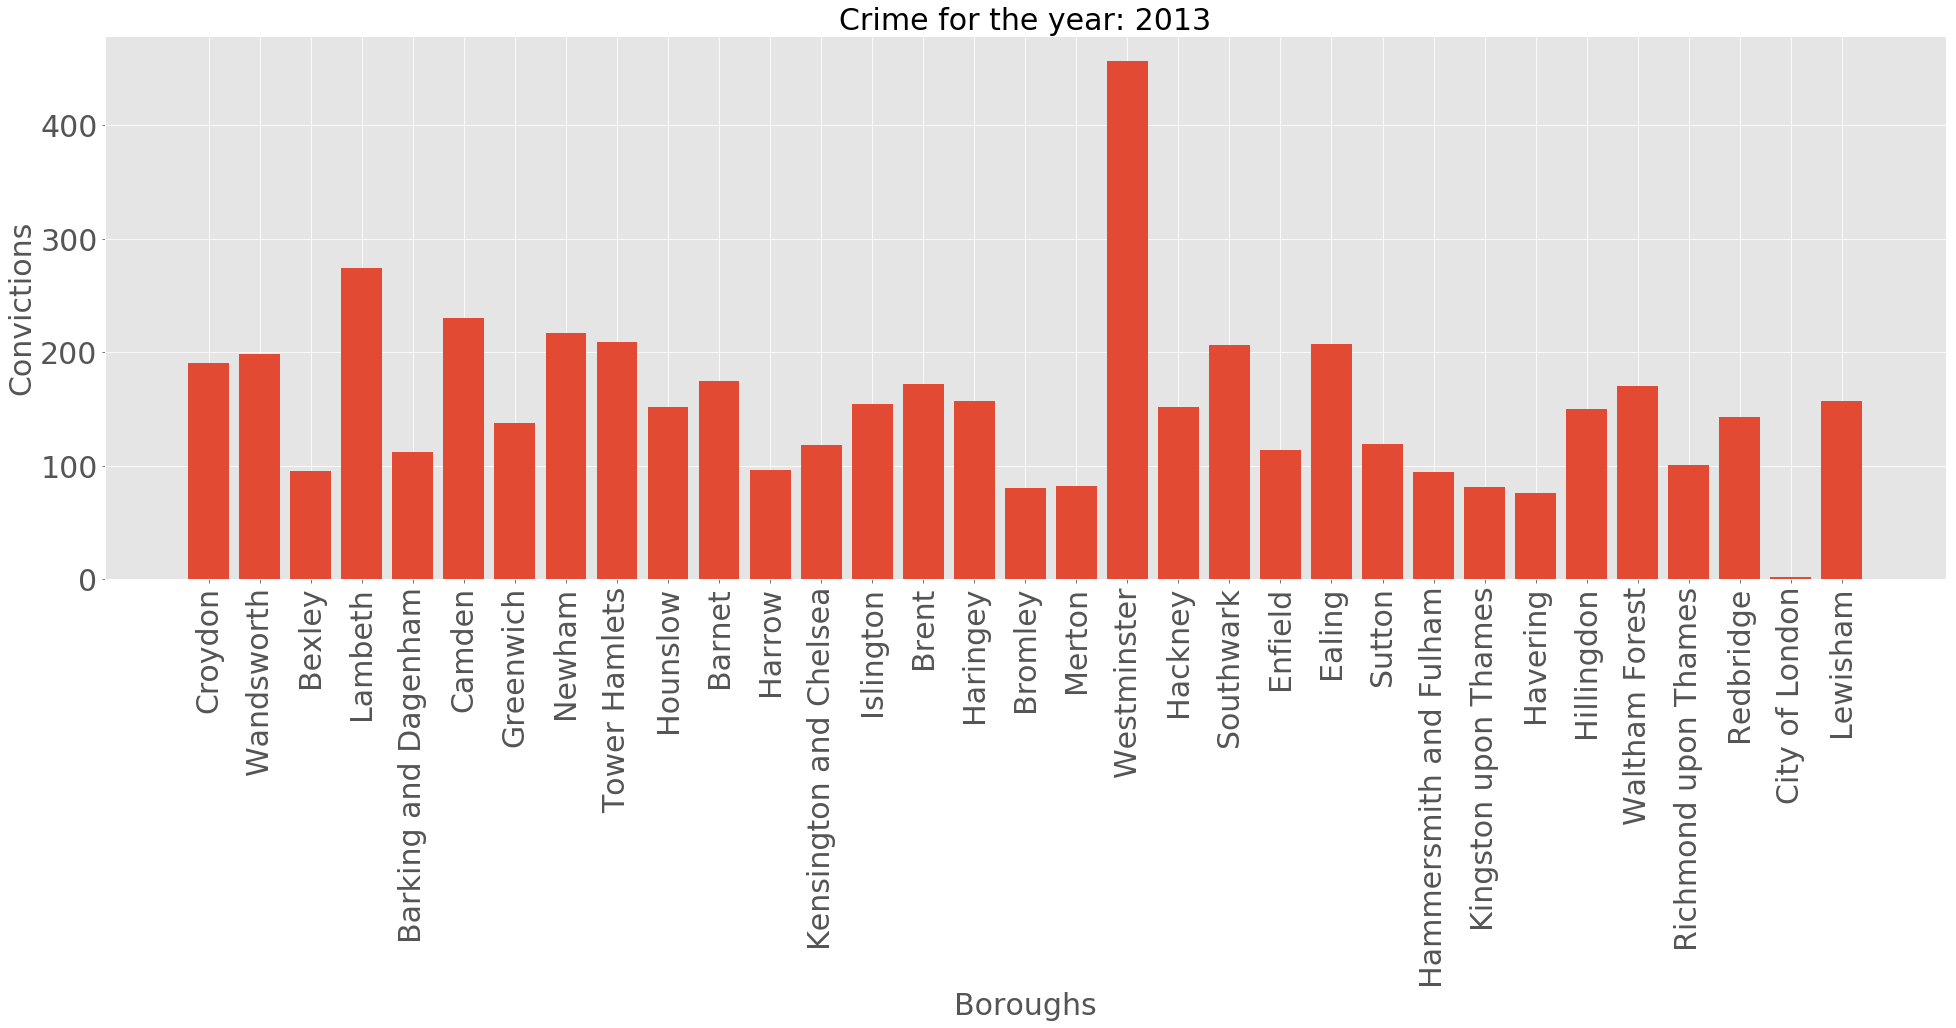

In [85]:
describe_year('2013')